# Model Validation & Comparison

This notebook performs robust validation using cross-validation
and compares models using multiple evaluation metrics.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [3]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [4]:
from src.validation import cross_validate
from src.evaluation import evaluate
from src.visualization import plot_roc
from src.models import get_models

## Load and Prepare Data

In [7]:
from src.preprocessing import (
    load_data,
    clean_data,
    encode_features,
    split_features_target
)

# Load dataset
df = load_data("../data/credit_risk_dataset.csv")

# Preprocess
df = clean_data(df)
df = encode_features(df)

# Feature-target split
X, y = split_features_target(df)

In [8]:
models = get_models()
cv_results = cross_validate(models, X, y)

cv_results

{'Logistic Regression': np.float64(0.8711841720700916),
 'Random Forest': np.float64(0.9339471705427369),
 'Gradient Boosting': np.float64(0.9254240589977336),
 'SVM': np.float64(0.8981249568812892),
 'XGBoost': np.float64(0.9465263048365655)}

## Cross-Validation Performance (ROC-AUC)

In [9]:
cv_df = pd.DataFrame.from_dict(
    cv_results, orient="index", columns=["ROC_AUC"]
).sort_values(by="ROC_AUC", ascending=False)

cv_df

,ROC_AUC
XGBoost,0.946526
Random Forest,0.933947
Gradient Boosting,0.925424
SVM,0.898125
Logistic Regression,0.871184


## Final Model Evaluation on Test Set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [12]:
final_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    final_results[name] = evaluate(model, X_test, y_test)

final_results

{'Logistic Regression': {'ROC_AUC': np.float64(0.8614435794192445),
  'Accuracy': 0.8603351955307262,
  'Precision': np.float64(0.7537399309551208),
  'Recall': np.float64(0.5278001611603546),
  'F1': np.float64(0.6208530805687204),
  'ConfusionMatrix': array([[4273,  214],
         [ 586,  655]])},
 'Random Forest': {'ROC_AUC': np.float64(0.9279665833807291),
  'Accuracy': 0.9282472067039106,
  'Precision': np.float64(0.9570484581497798),
  'Recall': np.float64(0.7002417405318292),
  'F1': np.float64(0.8087482550023266),
  'ConfusionMatrix': array([[4448,   39],
         [ 372,  869]])},
 'Gradient Boosting': {'ROC_AUC': np.float64(0.9231724489423918),
  'Accuracy': 0.9189944134078212,
  'Precision': np.float64(0.9218241042345277),
  'Recall': np.float64(0.6841257050765511),
  'F1': np.float64(0.7853839037927844),
  'ConfusionMatrix': array([[4415,   72],
         [ 392,  849]])},
 'SVM': {'ROC_AUC': np.float64(0.8893390108805688),
  'Accuracy': 0.9064245810055865,
  'Precision': np.f

## ROC Curve Comparison

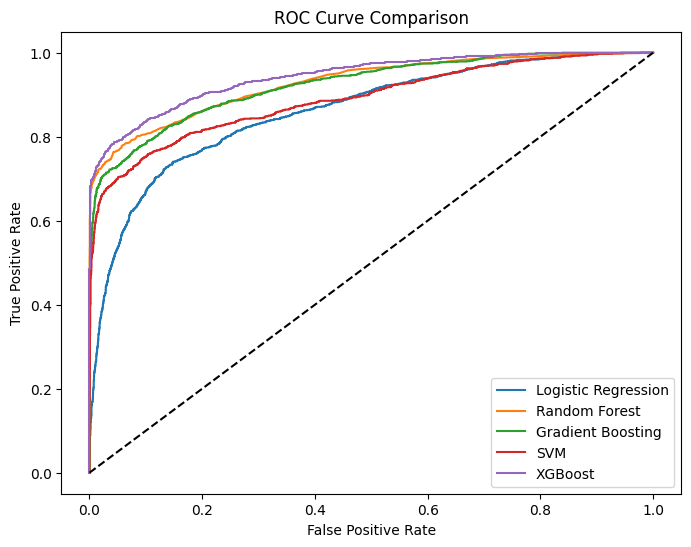

In [13]:
plot_roc(models, X_test, y_test)

## Conclusion

- XGBoost achieved the highest ROC-AUC and best generalization
- Logistic Regression remains valuable for interpretability
- Proper validation significantly changes model ranking